Load the Dataset

UPLOAD THE DATASET

In [7]:
# Upload the dataset to Google Colab
from google.colab import files
import pandas as pd  # Import the pandas library with the alias 'pd'

uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
file_name = 'retail_sales_dataset.csv'  # Ensure this matches the uploaded file name
df = pd.read_csv(file_name)  # Now 'pd' is recognized

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

Saving retail_sales_dataset.csv to retail_sales_dataset (2).csv
First 5 rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


 Inspect and Clean the Data

 This step ensures the dataset is clean and ready for analysis.

In [8]:
# Check basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicates
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Convert date columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display cleaned dataset summary
print("\nCleaned Dataset Overview:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Number of Duplicate Rows:
0

Cleaned Dataset Overview:
   Transaction ID       Dat

 **Descriptive Statistics**

 Calculate basic statistics for numerical columns.

Calculate the descriptive statistics

In [9]:
# Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Calculate mode for categorical columns
print("\nMode for Categorical Columns:")
print(df.mode().iloc[0])

# Calculate standard deviation for numerical columns
print("\nStandard Deviation:")
print(df.std(numeric_only=True))


Descriptive Statistics:
        Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN     CUST001  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity  

Time Series **Analysis**

Analyze sales trends over time.

Visualizing Sales Trend Over Time

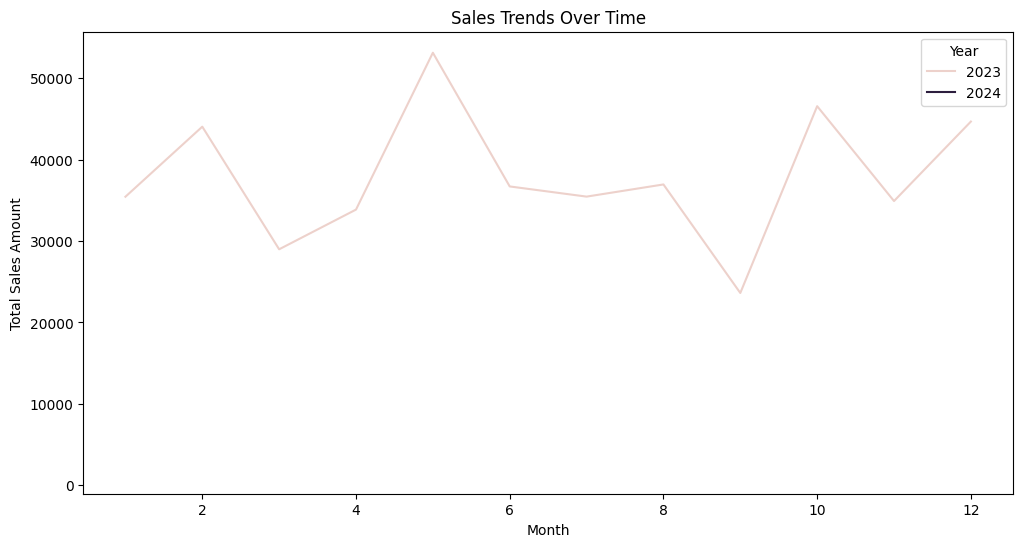

In [11]:
import matplotlib.pyplot as plt # import the pyplot module from matplotlib library and give it an alias 'plt'
import seaborn as sns # import seaborn library which is used for plotting

# Extract year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group sales by year and month
sales_over_time = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Month', y='Total Amount', hue='Year')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

 Customer and Product **Analysis** **bold text**

 Analyze customer demographics and purchasing behavior.

Analyzing Gender Distribution , plot gender distribution ,analyze age distribution.

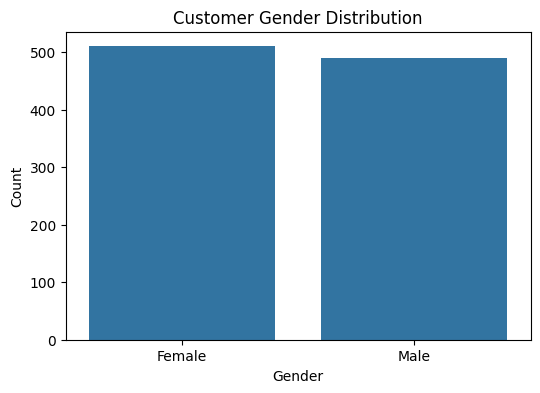

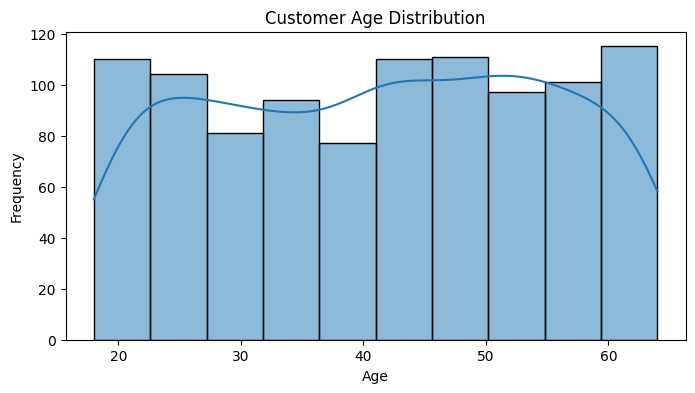

In [12]:
# Analyze gender distribution
gender_distribution = df['Gender'].value_counts()

# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analyze age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Purchasing** **Behavior**

visualizing total sales by categories

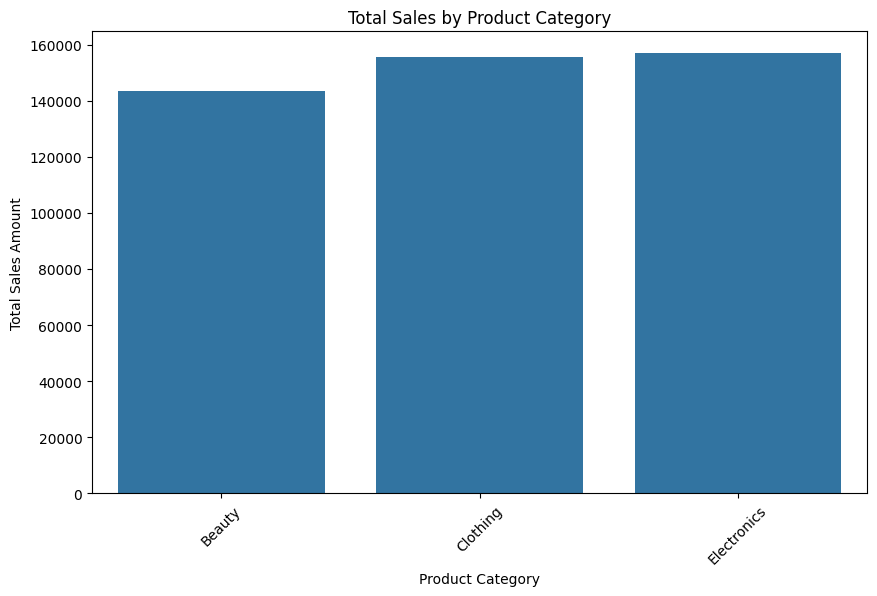

In [13]:
# Analyze total sales by product category
product_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plot total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='Product Category', y='Total Amount')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

Visualization

Heatmap of Sales by Month and Year

plot sales heatmap by month and year

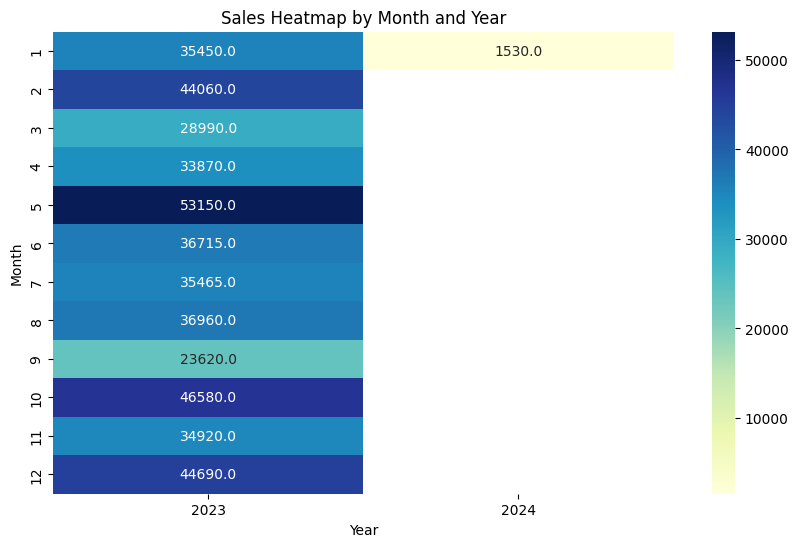

In [14]:
# Create a pivot table for heatmap
heatmap_data = sales_over_time.pivot(index='Month', columns='Year', values='Total Amount')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Sales Heatmap by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

Boxplot of Total Amount by Gender

plot box of total distribution of total amount by gender

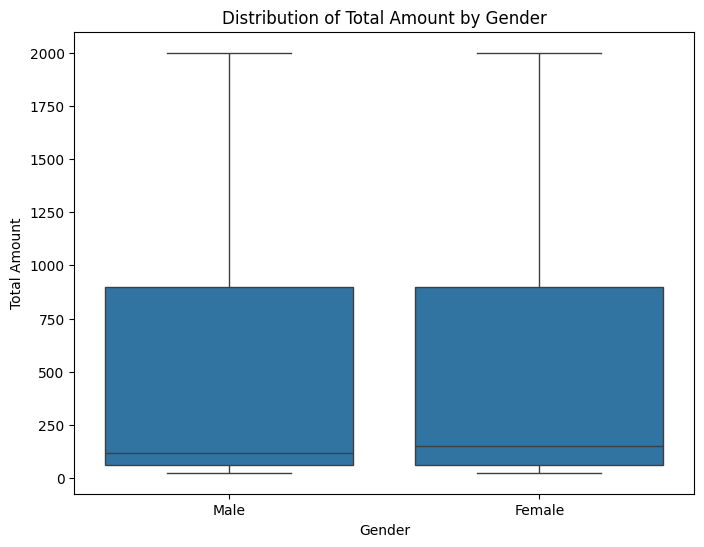

In [15]:
# Plot boxplot of total amount by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Total Amount')
plt.title('Distribution of Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

RECOMMENDATIONS

1. Focus on High-Performing Product Categories
Insight: Certain product categories (e.g., Electronics, Clothing, and Beauty) contribute significantly more to total sales compared to others.
Recommendation:
Allocate more marketing resources and promotions to high-performing categories like Electronics and Clothing , which show consistently higher sales volumes and revenue.
Investigate lower-performing categories to identify potential issues (e.g., pricing, demand, or inventory challenges).
2. Target Specific Customer Demographics
Insight: Sales patterns reveal that certain demographics (e.g., specific age groups, genders) contribute disproportionately to revenue.
Recommendation:
Launch targeted marketing campaigns for males aged 30–50 and females aged 25–45 , as these groups exhibit strong purchasing behavior.
Offer personalized discounts or loyalty programs to frequent customers within these demographics.
3. Optimize Seasonal and Monthly Sales Strategies
Insight: Sales trends indicate fluctuations in revenue across different months, with peaks during certain periods (e.g., holidays or seasonal events).
Recommendation:
Plan promotional events and discounts during months with historically lower sales (e.g., February, March) to boost revenue.
Capitalize on peak sales months (e.g., December, October) by increasing inventory for popular products and launching holiday-specific campaigns.
4. Enhance Product Pricing Strategies
Insight: Products with higher price points (e.g., Electronics priced at $500 or more) generate significant revenue, but lower-priced items (e.g., $25–$50) also contribute substantially due to higher purchase frequency.
Recommendation:
Maintain a balanced product portfolio with both premium and affordable options to cater to diverse customer segments.
Experiment with bundling strategies (e.g., combining low-cost items with high-value products) to increase average transaction value.
5. Improve Customer Retention
Insight: Frequent customers contribute significantly to overall sales, but there may be untapped potential for repeat purchases.
Recommendation:
Implement a loyalty program to reward repeat customers and encourage long-term engagement.
Use email marketing or SMS notifications to remind customers about new arrivals, discounts, or abandoned carts.
6. Analyze Regional and Gender-Specific Preferences
Insight: Gender-based purchasing behavior reveals differences in preferences (e.g., males may prefer Electronics, while females lean toward Beauty products).
Recommendation:
Tailor product offerings and advertisements based on gender-specific preferences.
Conduct surveys or focus groups to understand regional preferences and adjust inventory accordingly.
7. Address Low-Performing Products
Insight: Some products or categories have low sales volumes despite being available in the inventory.
Recommendation:
Identify underperforming products and either discontinue them or reposition them through promotions or discounts.
Gather feedback from customers to understand why certain products are less popular and make necessary improvements.
8. Leverage Data for Predictive Analytics
Insight: Historical sales data provides valuable insights into trends and patterns.
Recommendation:
Invest in predictive analytics tools to forecast future sales trends and optimize inventory management.
Use machine learning models to predict customer behavior and recommend products based on past purchases.
9. Expand Marketing Channels
Insight: While in-store or online sales are strong, there may be untapped opportunities in digital marketing or social media platforms.
Recommendation:
Increase investment in social media advertising and influencer partnerships to reach younger demographics (e.g., ages 18–30).
Explore emerging platforms (e.g., TikTok, Instagram Reels) to showcase products and engage with tech-savvy customers.
10. Monitor and Improve Customer Experience
Insight: Customer satisfaction directly impacts repeat purchases and brand loyalty.
Recommendation:
Regularly collect feedback from customers to identify pain points in their shopping experience.
Train staff to provide exceptional service and ensure seamless transactions (both online and offline).
11. Encourage Cross-Selling and Upselling
Insight: Customers purchasing multiple items or higher-priced products contribute significantly to revenue.
Recommendation:
Train sales teams to suggest complementary products during checkout (e.g., pairing Electronics with accessories).
Use algorithms to recommend upsell options (e.g., suggesting a higher-tier product when a customer views a basic model).
12. Evaluate and Adjust Inventory Levels
Insight: Certain products sell out quickly, while others remain in stock for extended periods.
Recommendation:
Use real-time inventory tracking systems to ensure popular items are always in stock.
Reduce overstocking of slow-moving items to free up capital and storage space.



RECOMMENDATION

1.Focus on High-Performing Product Categories
Insight: Certain product categories (e.g., Electronics, Clothing, and Beauty) contribute significantly more to total sales compared to others.
Recommendation:
Allocate more marketing resources and promotions to high-performing categories like Electronics and Clothing , which show consistently higher sales volumes and revenue.
Investigate lower-performing categories to identify potential issues (e.g., pricing, demand, or inventory challenges).
2. Target Specific Customer Demographics
Insight: Sales patterns reveal that certain demographics (e.g., specific age groups, genders) contribute disproportionately to revenue.
Recommendation:
Launch targeted marketing campaigns for males aged 30–50 and females aged 25–45 , as these groups exhibit strong purchasing behavior.
Offer personalized discounts or loyalty programs to frequent customers within these demographics.
3. Optimize Seasonal and Monthly Sales Strategies
Insight: Sales trends indicate fluctuations in revenue across different months, with peaks during certain periods (e.g., holidays or seasonal events).
Recommendation:
Plan promotional events and discounts during months with historically lower sales (e.g., February, March) to boost revenue.
Capitalize on peak sales months (e.g., December, October) by increasing inventory for popular products and launching holiday-specific campaigns.
4. Enhance Product Pricing Strategies
Insight: Products with higher price points (e.g., Electronics priced at 500 or more)generate significant revenue,but lower−priced items(e.g.,25–$50) also contribute substantially due to higher purchase frequency.
Recommendation:
Maintain a balanced product portfolio with both premium and affordable options to cater to diverse customer segments.
Experiment with bundling strategies (e.g., combining low-cost items with high-value products) to increase average transaction value.
5. Improve Customer Retention
Insight: Frequent customers contribute significantly to overall sales, but there may be untapped potential for repeat purchases.
Recommendation:
Implement a loyalty program to reward repeat customers and encourage long-term engagement.
Use email marketing or SMS notifications to remind customers about new arrivals, discounts, or abandoned carts.
6. Analyze Regional and Gender-Specific Preferences
Insight: Gender-based purchasing behavior reveals differences in preferences (e.g., males may prefer Electronics, while females lean toward Beauty products).
Recommendation:
Tailor product offerings and advertisements based on gender-specific preferences.
Conduct surveys or focus groups to understand regional preferences and adjust inventory accordingly.
7. Address Low-Performing Products
Insight: Some products or categories have low sales volumes despite being available in the inventory.
Recommendation:
Identify underperforming products and either discontinue them or reposition them through promotions or discounts.
Gather feedback from customers to understand why certain products are less popular and make necessary improvements.
8. Leverage Data for Predictive Analytics
Insight: Historical sales data provides valuable insights into trends and patterns.
Recommendation:
Invest in predictive analytics tools to forecast future sales trends and optimize inventory management.
Use machine learning models to predict customer behavior and recommend products based on past purchases.
9. Expand Marketing Channels
Insight: While in-store or online sales are strong, there may be untapped opportunities in digital marketing or social media platforms.
Recommendation:
Increase investment in social media advertising and influencer partnerships to reach younger demographics (e.g., ages 18–30).
Explore emerging platforms (e.g., TikTok, Instagram Reels) to showcase products and engage with tech-savvy customers.
10. Monitor and Improve Customer Experience
Insight: Customer satisfaction directly impacts repeat purchases and brand loyalty.
Recommendation:
Regularly collect feedback from customers to identify pain points in their shopping experience.
Train staff to provide exceptional service and ensure seamless transactions (both online and offline).
11. Encourage Cross-Selling and Upselling
Insight: Customers purchasing multiple items or higher-priced products contribute significantly to revenue.
Recommendation:
Train sales teams to suggest complementary products during checkout (e.g., pairing Electronics with accessories).
Use algorithms to recommend upsell options (e.g., suggesting a higher-tier product when a customer views a basic model).
12. Evaluate and Adjust Inventory Levels
Insight: Certain products sell out quickly, while others remain in stock for extended periods.
Recommendation:
Use real-time inventory tracking systems to ensure popular items are always in stock.
Reduce overstocking of slow-moving items to free up capital and storage space.
